In [ ]:
# Colab 폴더로 경로 이동
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning

/content/drive/MyDrive/Colab Notebooks/DeepLearning


# PCA(주성분 분석)
  - 전체특성(Feature)에서 주요 특성 압축/융합하는 비지도 학습
  - fit() + transform() 2단계 거쳐 주성분 분석

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# [1] 데이터 준비
---

In [2]:
X,y = load_iris(return_X_y = True, as_frame= True)

In [3]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [5]:
irisDF = pd.concat([X,y], axis =1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f862676bfd0>,
      dtype=object)

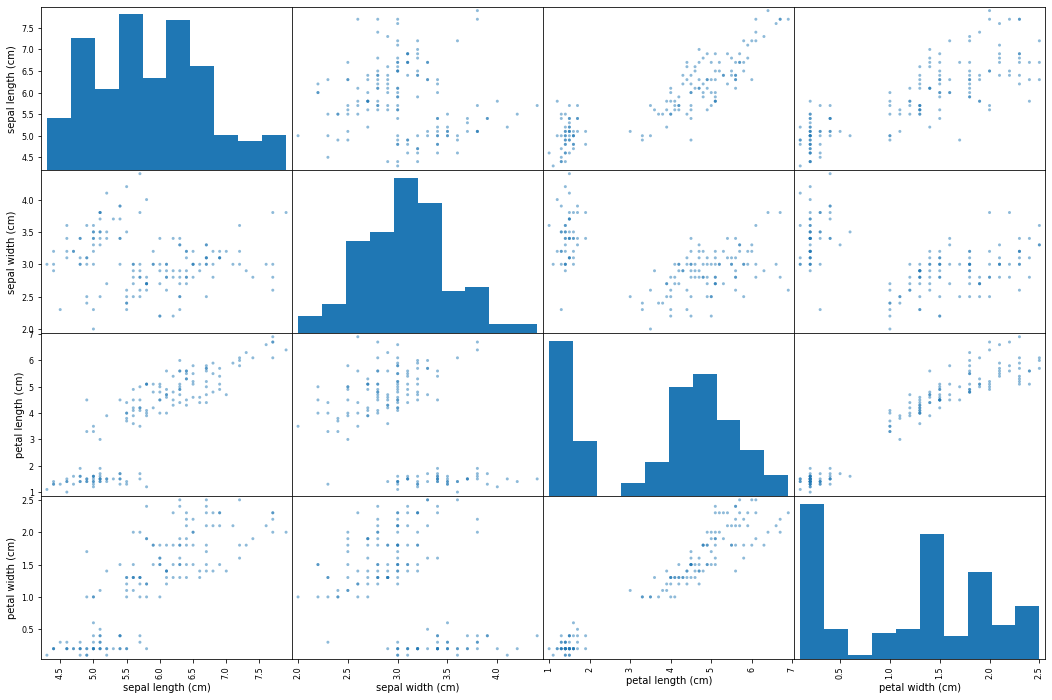

In [6]:
scatter_matrix(X,figsize = (18,12))

In [7]:
# 타겟별 시각화
target_0  = irisDF[irisDF.target== 0]
target_1  = irisDF[irisDF.target== 1]
target_2  = irisDF[irisDF.target== 2]

In [ ]:
target_0.head()

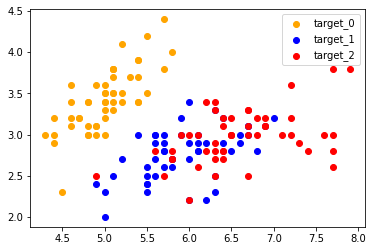

In [10]:
plt.scatter(target_0['sepal length (cm)'], target_0['sepal width (cm)'], c='orange')
plt.scatter(target_1['sepal length (cm)'], target_1['sepal width (cm)'], c='blue')
plt.scatter(target_2['sepal length (cm)'], target_2['sepal width (cm)'], c='red')
plt.legend(['target_0','target_1','target_2'])
plt.show()

# [2]데이터 전처리

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# [3]PCA 주성분 분석
---
- iris의 4개 Feature 중에서 주성분 데이터 추출


In [15]:
# 지정된 데이터에서 주성분 추출 =>
pca = PCA()
pca.fit(X_scaled)

PCA()

In [16]:
# 주성분 행렬
pca.singular_values_

array([20.92306556, 11.7091661 ,  4.69185798,  1.76273239])

In [17]:
# 주성분에 투영 후 분산 정도 설명
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [18]:
# 주성분에 투영 후 분산 정도 설명 비율로 보기
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

## [4]주성분 갯수 지정
---
- 방법1) explained_variance_ratio_의 누적값에서 원하는 분포정도 지정해서 PC갯수 계산
- 방법2) n_compnets = 0.0 ~ 0.1 : 주성분 투영된 데이터 분포 정도 지정하면 PC갯수 자동 계산

### [4-1]방법1 : explained_variance_ratio_누적값으로 PC 차원수 계산


In [ ]:
import numpy as np

In [20]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.95) + 1
print(f'주성분 갯수(차원) : {dim}')

주성분 갯수(차원) : 2


In [28]:
## 지정된 차원수(PC갯수)로 주성분 데이터 압축/융합
pca_2 = PCA(n_components = dim)
pca_2.fit(X_scaled)
irisPCA = pca_2.transform(X_scaled)

In [29]:
print(irisPCA.shape)
irisPCA[:5]

(150, 2)


array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

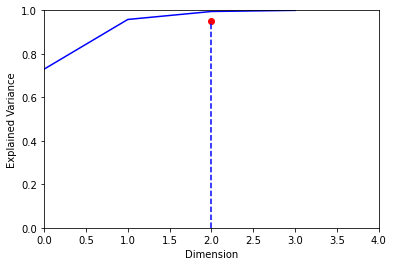

In [30]:
## 주성분과 데이터 투영 분산 정도 시각화
plt.plot(cumsum,'b-')
plt.plot(dim, 0.95, 'ro')
plt.plot([2.0,2.0],[0,0.95], 'b--')
plt.axis([0,4,0,1])
plt.xlabel('Dimension')
plt.ylabel('Explained Variance')
plt.show()

#[4-2] 방법2: n_components=비율값

In [31]:
pca_3 = PCA(n_components = 0.95)
pca_3.fit(X_scaled)
irisPCA_2 = pca_3.transform(X_scaled)

In [33]:
print(pca_3.explained_variance_,pca_3.explained_variance_ratio_)
irisPCA_2[:5]

[2.93808505 0.9201649 ] [0.72962445 0.22850762]


array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [41]:
irisPCADF = pd.DataFrame(irisPCA_2,columns=['pca_1','pca_2'])
irisPCADF = pd.concat([irisPCADF,y],axis=1)

In [42]:
irisPCADF

,pca_1,pca_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


In [43]:
# 타겟별 시각화
target_0  = irisPCADF[irisPCADF.target== 0]
target_1  = irisPCADF[irisPCADF.target== 1]
target_2  = irisPCADF[irisPCADF.target== 2]

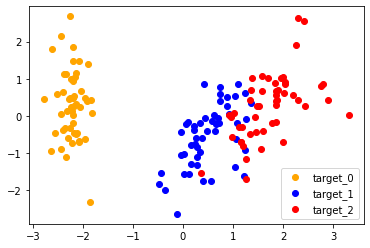

In [44]:
plt.scatter(target_0['pca_1'], target_0['pca_2'], c='orange')
plt.scatter(target_1['pca_1'], target_1['pca_2'], c='blue')
plt.scatter(target_2['pca_1'], target_2['pca_2'], c='red')
plt.legend(['target_0','target_1','target_2'])
plt.show()

In [45]:
re = pca_3.inverse_transform(irisPCA_2)
re.shape

(150, 4)